In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving speech-emotion-recognition-ravdess-data.zip to speech-emotion-recognition-ravdess-data (1).zip


In [ ]:
!unzip /content/speech-emotion-recognition-ravdess-data.zip -d /content/

Archive:  /content/speech-emotion-recognition-ravdess-data.zip
   creating: /content/Actor_01/
  inflating: /content/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: /content/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: /content/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: /content/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: /content/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: /content/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: /content/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: /content/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: /content/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: /content/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: /content/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: /content/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: /content/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: /content/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: /content/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: /content/Actor_01/03-0

In [ ]:
import zipfile
import os

zip_path = "speech-emotion-recognition-ravdess-data.zip"  # uploaded file
extract_path = "data"  # destination folder

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted to:", extract_path)


✅ Dataset extracted to: data


In [ ]:
pip install librosa soundfile numpy matplotlib scikit-learn IPython sounddevice scipy


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Audio



In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


In [ ]:
audio_files = []
for root, dirs, files in os.walk("data"):
    for file in files:
        if file.endswith(".wav"):
            audio_files.append(os.path.join(root, file))


In [ ]:
# Define a function to extract MFCC features from an audio file
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    return mfccs_processed


In [ ]:
import librosa

file_path = "/content/Actor_21/03-01-02-02-02-01-21.wav"
y, sr = librosa.load(file_path, duration=3, offset=0.5)

print(f"✅ Loaded file with {len(y)} samples at {sr} Hz")


✅ Loaded file with 66150 samples at 22050 Hz


In [ ]:
import librosa
import numpy as np
import soundfile

# Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc=True, chroma=True, mel=True):
    # Load the audio file
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")  # Read audio data
        sample_rate = sound_file.samplerate  # Get sample rate

    # Compute STFT for chroma (if needed)
    if chroma:
        stft = np.abs(librosa.stft(X))  # Short-time Fourier Transform

    # Initialize result array
    result = np.array([])

    # Extract MFCC features if mfcc is True
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))

    # Extract chroma features if chroma is True
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
        result = np.hstack((result, chroma))

    # Extract mel spectrogram features if mel is True
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0)
        result = np.hstack((result, mel))

    return result

In [ ]:
import os
import glob
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming extract_feature, emotions, and observed_emotions are defined earlier
# from your previous code snippets

def load_data(test_size=0.2):
    x, y = [], []  # Initialize empty lists for features and labels

    # Glob pattern to find all .wav files in the Actor folders
    for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/RAVDESS Emotional speech audio/Actor_*/*.wav"):
        file_name = os.path.basename(file)  # Get the filename from the path
        emotion_code = file_name.split("-")[2]  # Extract the emotion code (e.g., '03')
        emotion = emotions.get(emotion_code, 'unknown')  # Map code to emotion

        # Skip if emotion is not in observed_emotions
        if emotion not in observed_emotions:
            continue

        # Extract features using the extract_feature function
        feature = extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)

    return train_test_split(np.array(x), np.array(y), test_size=test_size, random_state=42)


In [ ]:
import os

for root, dirs, files in os.walk("data"):
    for file in files:
        if file.endswith(".wav"):
            print("📄", os.path.join(root, file))


In [ ]:
import os

# Walk through the folder and print files
for root, dirs, files in os.walk("data"):
    for file in files:
        if file.endswith(".wav"):
            print("Found:", os.path.join(root, file))
            print(" Sample filename:", file)
            break  # Stop after first match to avoid too many prints
    break  # Stop after first folder


In [ ]:
import os
import librosa
import numpy as np

# Emotion mapping based on RAVDESS filename structure
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

X = []
y = []

data_path = "data"

# Walk through each actor folder
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            try:
                # Extract emotion code from filename: '03-01-05-01-02-01-12.wav'
                emotion_code = file.split("-")[2]
                emotion = emotion_map.get(emotion_code)
                if emotion:
                    audio, sr = librosa.load(file_path, duration=3, offset=0.5)
                    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                    mfccs_mean = np.mean(mfccs.T, axis=0)
                    X.append(mfccs_mean)
                    y.append(emotion)
            except Exception as e:
                print(" Error processing", file_path, ":", e)

print("✅ Features and labels extracted!")
print(f"X shape: {len(X)} | y shape: {len(y)}")


✅ Features and labels extracted!
X shape: 1440 | y shape: 1440


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [ ]:
 #Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

 Accuracy: 0.6354166666666666

 Classification Report:
               precision    recall  f1-score   support

       angry       0.74      0.78      0.76        32
        calm       0.77      0.73      0.75        56
     disgust       0.65      0.68      0.67        38
     fearful       0.64      0.55      0.59        33
       happy       0.69      0.59      0.63        34
     neutral       0.40      0.57      0.47        14
         sad       0.49      0.44      0.46        41
   surprised       0.57      0.68      0.62        40

    accuracy                           0.64       288
   macro avg       0.62      0.63      0.62       288
weighted avg       0.64      0.64      0.64       288



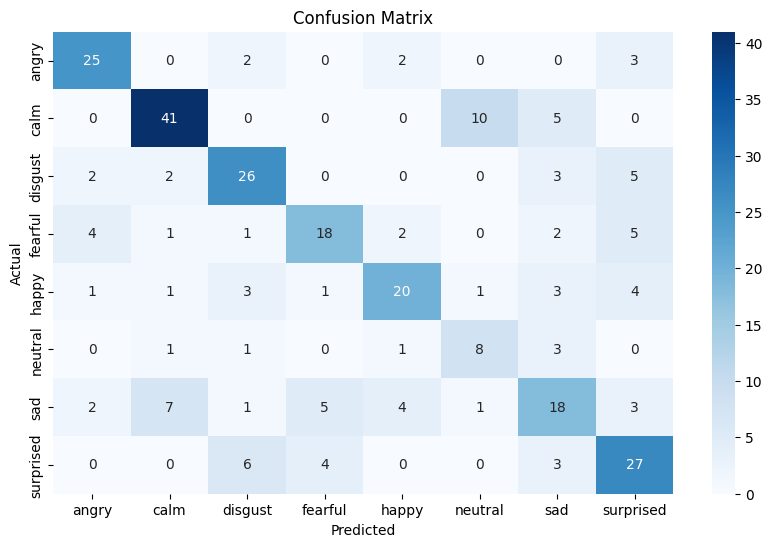

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Accuracy score
print(" Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Encode string labels to integers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# ---- RANDOM FOREST ----
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_encoded)
rf_pred = rf_model.predict(X_test)
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test_encoded, rf_pred))
print(classification_report(y_test_encoded, rf_pred, target_names=le.classes_))

# ---- XGBOOST ----
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train_encoded)
xgb_pred = xgb_model.predict(X_test)
print("=== XGBoost ===")
print("Accuracy:", accuracy_score(y_test_encoded, xgb_pred))
print(classification_report(y_test_encoded, xgb_pred, target_names=le.classes_))

# ---- SVM (with StandardScaler) ----
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=10, gamma='scale'))
svm_model.fit(X_train, y_train_encoded)
svm_pred = svm_model.predict(X_test)
print("=== SVM (RBF Kernel) ===")
print("Accuracy:", accuracy_score(y_test_encoded, svm_pred))
print(classification_report(y_test_encoded, svm_pred, target_names=le.classes_))


=== Random Forest ===
Accuracy: 0.6111111111111112
              precision    recall  f1-score   support

       angry       0.73      0.79      0.76        38
        calm       0.58      0.79      0.67        38
     disgust       0.51      0.63      0.56        38
     fearful       0.66      0.59      0.62        39
       happy       0.71      0.62      0.66        39
     neutral       0.47      0.37      0.41        19
         sad       0.67      0.53      0.59        38
   surprised       0.53      0.46      0.49        39

    accuracy                           0.61       288
   macro avg       0.61      0.60      0.60       288
weighted avg       0.62      0.61      0.61       288

=== XGBoost ===
Accuracy: 0.5173611111111112
              precision    recall  f1-score   support

       angry       0.60      0.63      0.62        38
        calm       0.66      0.76      0.71        38
     disgust       0.50      0.58      0.54        38
     fearful       0.51      0.49   

<ipython-input-27-e1e2a66d7f91>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='coolwarm')


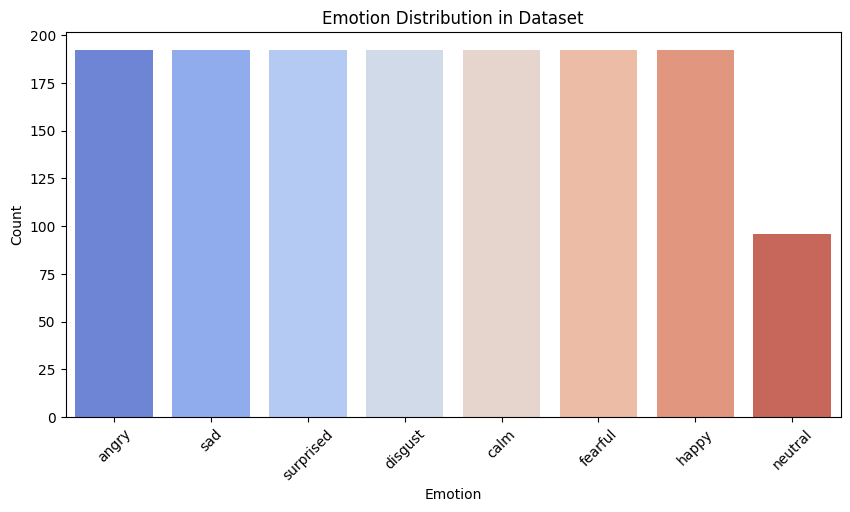

<ipython-input-27-e1e2a66d7f91>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[emotion], y=[count], palette='Set2')


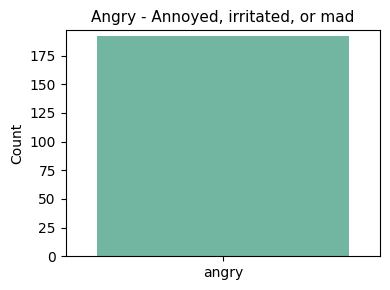

<ipython-input-27-e1e2a66d7f91>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[emotion], y=[count], palette='Set2')


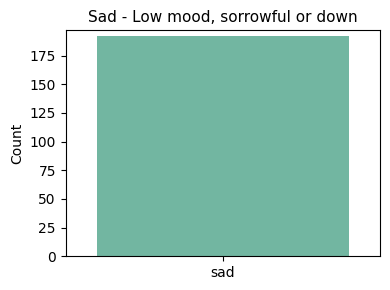

<ipython-input-27-e1e2a66d7f91>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[emotion], y=[count], palette='Set2')


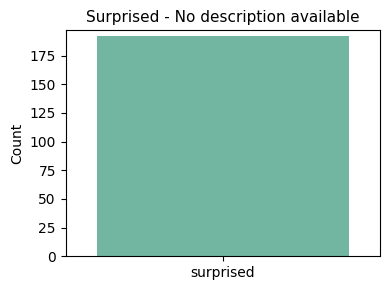

<ipython-input-27-e1e2a66d7f91>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[emotion], y=[count], palette='Set2')


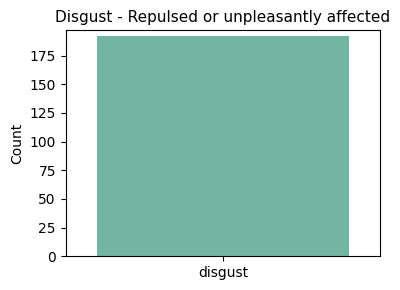

<ipython-input-27-e1e2a66d7f91>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[emotion], y=[count], palette='Set2')


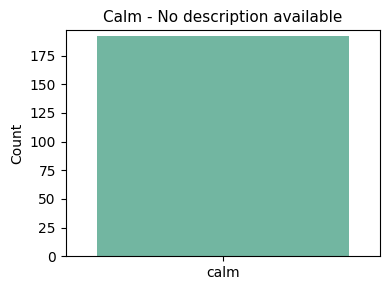

<ipython-input-27-e1e2a66d7f91>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[emotion], y=[count], palette='Set2')


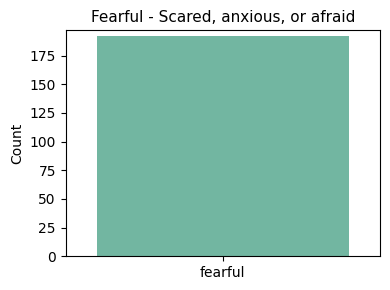

<ipython-input-27-e1e2a66d7f91>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[emotion], y=[count], palette='Set2')


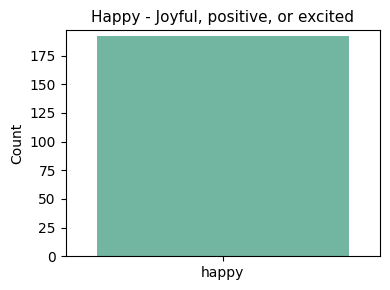

<ipython-input-27-e1e2a66d7f91>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[emotion], y=[count], palette='Set2')


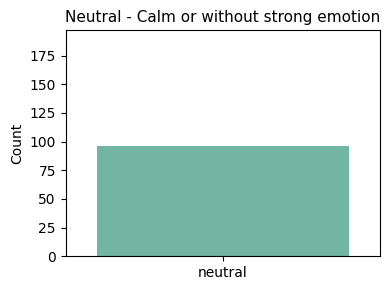

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# y_encoded and le are already defined before this
emotion_df = pd.DataFrame({'Emotion': le.inverse_transform(y_encoded)})
emotion_counts = emotion_df['Emotion'].value_counts()

# 1. Plot overall emotion distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='coolwarm')
plt.title("Emotion Distribution in Dataset")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 2. Emotion feelings dictionary
emotion_feelings = {
    'neutral': 'Calm or without strong emotion',
    'happy': 'Joyful, positive, or excited',
    'sad': 'Low mood, sorrowful or down',
    'angry': 'Annoyed, irritated, or mad',
    'fearful': 'Scared, anxious, or afraid',
    'disgust': 'Repulsed or unpleasantly affected',
    'surprise': 'Shocked, startled, or amazed'
}

# 3. Individual emotion plots with feelings
for emotion in emotion_counts.index:
    count = emotion_counts[emotion]
    feeling = emotion_feelings.get(emotion, "No description available")

    plt.figure(figsize=(4, 3))
    sns.barplot(x=[emotion], y=[count], palette='Set2')
    plt.title(f"{emotion.capitalize()} - {feeling}", fontsize=11)
    plt.ylabel("Count")
    plt.ylim(0, max(emotion_counts.values) + 5)
    plt.tight_layout()
    plt.show()


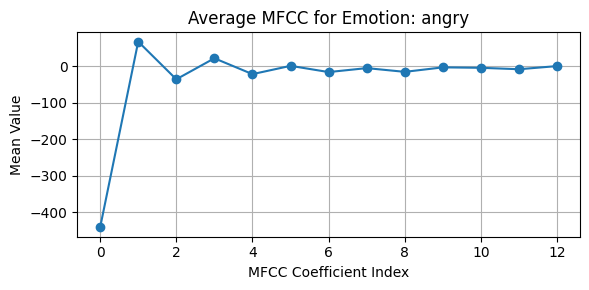

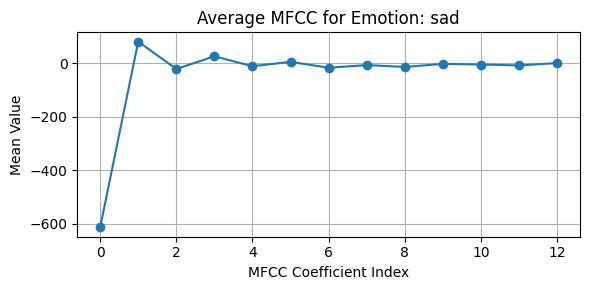

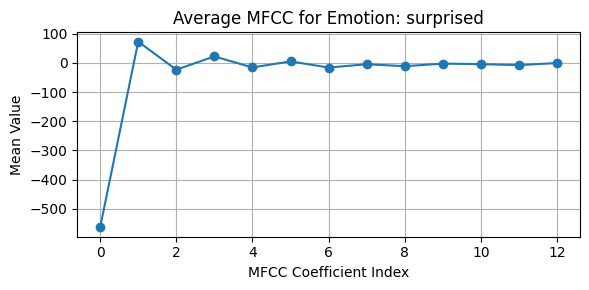

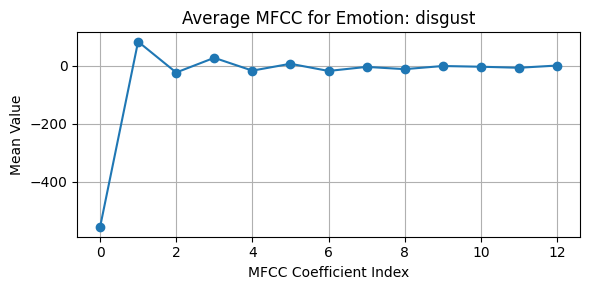

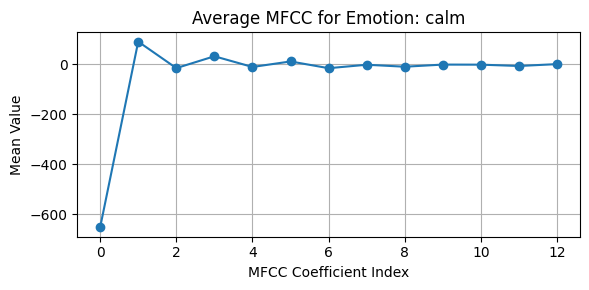

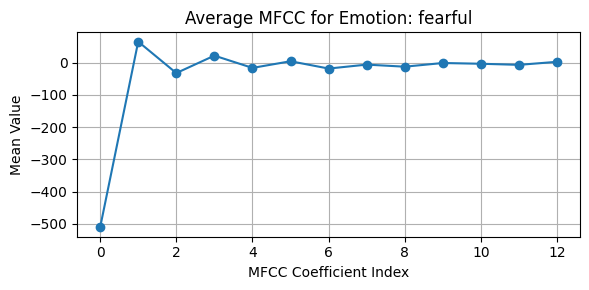

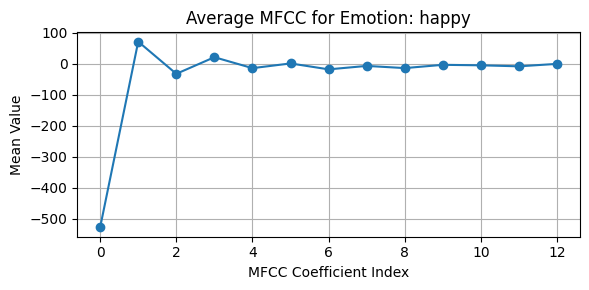

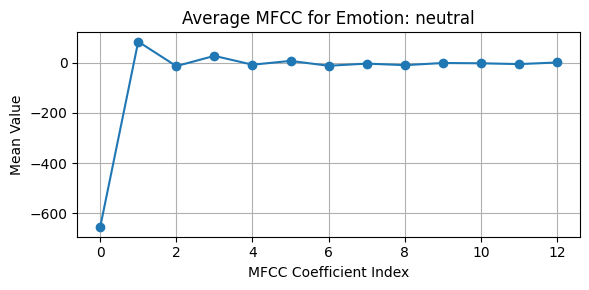

In [ ]:
# Emotion-wise MFCC Mean Plot
emotion_mfccs = {}

for i, label in enumerate(y):
    if label not in emotion_mfccs:
        emotion_mfccs[label] = []
    emotion_mfccs[label].append(X[i])

# Plot mean MFCCs for each emotion
for emotion, features in emotion_mfccs.items():
    mean_mfcc = np.mean(features, axis=0)
    plt.figure(figsize=(6, 3))
    plt.plot(mean_mfcc, marker='o')
    plt.title(f"Average MFCC for Emotion: {emotion}")
    plt.xlabel("MFCC Coefficient Index")
    plt.ylabel("Mean Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
def emotion_summary(emotion_counts):
    total_samples = sum(emotion_counts.values)
    summary = f" The dataset contains a total of {total_samples} audio samples.\n\n"
    summary += " Emotion distribution:\n"
    for emotion, count in emotion_counts.items():
        percent = (count / total_samples) * 100
        summary += f"  • {emotion.capitalize()}: {count} samples ({percent:.1f}%)\n"
    most_common = emotion_counts.idxmax()
    summary += f"\n✅ Most represented emotion: **{most_common.upper()}**"
    return summary

print(emotion_summary(emotion_counts))


 The dataset contains a total of 1440 audio samples.

 Emotion distribution:
  • Angry: 192 samples (13.3%)
  • Sad: 192 samples (13.3%)
  • Surprised: 192 samples (13.3%)
  • Disgust: 192 samples (13.3%)
  • Calm: 192 samples (13.3%)
  • Fearful: 192 samples (13.3%)
  • Happy: 192 samples (13.3%)
  • Neutral: 96 samples (6.7%)

✅ Most represented emotion: **ANGRY**


In [ ]:
top_emotions = emotion_counts.sort_values(ascending=False).head(3)

print("🔥 Top 3 Emotions in the Dataset:")
for i, (emotion, count) in enumerate(top_emotions.items(), 1):
    print(f"{i}. {emotion.capitalize()} - {count} samples")


🔥 Top 3 Emotions in the Dataset:
1. Angry - 192 samples
2. Sad - 192 samples
3. Surprised - 192 samples


In [ ]:
import os
print(os.listdir())


['.config', 'drive', 'Untitled7.ipynb', 'speech-emotion-recognition-ravdess-data.zip', 'realtime_20250422_012850.wav', 'sample_data']


In [ ]:
import numpy as np

# List your audio file names here (replace with your actual filenames)
file_names = [
    "file1.wav", "file2.wav", "file3.wav", "file4.wav", "file5.wav"
]

# Dummy emotion labels (you can change these later)
dummy_emotions = ['happy', 'sad', 'angry', 'neutral', 'fear']

# Dummy intensity values (just random floats between 0.5 and 1.0)
dummy_intensities = np.random.uniform(0.5, 1.0, size=5)

# Extract features from each file
X = []
for file in file_names:
    features = extract_features(file)
    X.append(features)

X = np.array(X)
y_emotion = np.array(dummy_emotions)
y_intensity = np.array(dummy_intensities)


In [ ]:
import numpy as np

# Replace these with the exact names of  uploaded files
file_names = [
    "realtime_20250422_012635.wav",  # change to actual filename
    "realtime_20250422_012850.wav",  # change to actual filename
    "test_voice.wav"   # change to actual filename
]

# Dummy emotion labels
dummy_emotions = ['happy', 'sad', 'angry']

# Dummy intensity values (just random for now)
dummy_intensities = np.random.uniform(0.5, 1.0, size=3)

# Extract features from each file
X = []
for file in file_names:
    features = extract_features(file)
    X.append(features)

X = np.array(X)
y_emotion = np.array(dummy_emotions)
y_intensity = np.array(dummy_intensities)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

# Small dataset: use all for training
X_train = X
y_train_emotion = y_emotion
y_train_intensity = y_intensity

# Train classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train_emotion)

# Train regressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train_intensity)


RandomForestRegressor()

In [ ]:
import numpy as np
import librosa

#  correct audio filename here:
filename = 'realtime_20250422_012850.wav'

def extract_features(file):
    audio, sample_rate = librosa.load(file, sr=None)
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfccs

features = extract_features(filename).reshape(1, -1)

predicted_emotion = classifier.predict(features)[0]
predicted_intensity = regressor.predict(features)[0]

print(f"🎭 Emotion: {predicted_emotion}")
print(f"🔥 Intensity: {predicted_intensity:.2f} %")


🎭 Emotion: sad
🔥 Intensity: 0.75 %
